# ASSIGNMENT - SUPPORT VECTOR MACHINE( SVM )

<h1><font color = "red">[1] READING DATA </font></h1>

In [1]:
import pandas as pd

project_data=pd.read_csv("Donor_choose/train_data.csv")
resource_data=pd.read_csv("Donor_choose/resources.csv")

# [2] Sorting data according to time [TBS]

In [2]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols=['Date' if x=='project_submitted_datetime'else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

print(cols)
project_data.head(2)

['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [3]:
print(project_data.shape)
print("="*100)
print(project_data.columns.values)
print("="*100)
print(resource_data.shape)
print("="*100)
print(resource_data.columns.values)

(109248, 17)
['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_grade_category' 'project_subject_categories'
 'project_subject_subcategories' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved']
(1541272, 4)
['id' 'description' 'quantity' 'price']


# [3] Preproccesing Steps

In [4]:
categories=list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [5]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds


In [6]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [7]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
sorted_cat_dict

{'Warmth': 1388,
 'Care_Hunger': 1388,
 'History_Civics': 5914,
 'Music_Arts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'Health_Sports': 14223,
 'Math_Science': 41421,
 'Literacy_Language': 52239}

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [9]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds


In [10]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [11]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
sorted_sub_cat_dict

{'Economics': 269,
 'CommunityService': 441,
 'FinancialLiteracy': 568,
 'ParentInvolvement': 677,
 'Extracurricular': 810,
 'Civics_Government': 815,
 'ForeignLanguages': 890,
 'NutritionEducation': 1355,
 'Warmth': 1388,
 'Care_Hunger': 1388,
 'SocialSciences': 1920,
 'PerformingArts': 1961,
 'CharacterEducation': 2065,
 'TeamSports': 2192,
 'Other': 2372,
 'College_CareerPrep': 2568,
 'Music': 3145,
 'History_Geography': 3171,
 'Health_LifeScience': 4235,
 'EarlyDevelopment': 4254,
 'ESL': 4367,
 'Gym_Fitness': 4509,
 'EnvironmentalScience': 5591,
 'VisualArts': 6278,
 'Health_Wellness': 10234,
 'AppliedSciences': 10816,
 'SpecialNeeds': 13642,
 'Literature_Writing': 22179,
 'Mathematics': 28074,
 'Literacy': 33700}

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)
print(project_data["essay"].value_counts)
project_data.head(2)


<bound method IndexOpsMixin.value_counts of 55660     I have been fortunate enough to use the Fairy ...
76127     Imagine being 8-9 years old. You're in your th...
51140     Having a class of 24 students comes with diver...
473       I recently read an article about giving studen...
41558     My students crave challenge, they eat obstacle...
29891     It's the end of the school year. Routines have...
81565     \"Sitting still is overrated. It makes sense f...
79026     It’s not enough to read a book and write an es...
23374     Never has society so rapidly changed. Technolo...
86551     Do you remember the first time you saw Star Wa...
49228     My students yearn for a classroom environment ...
72638     Media and cinematography has been an extremely...
7176      Computer coding and robotics, my second grader...
70898     I teach 4th grade math, writing, social studie...
102755    In my classroom we explore and delve into real...
72593     A typical day in my classroom starts 30 minute

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [13]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [14]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [15]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [16]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

In [17]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
import numpy as np


t = PrettyTable()
t.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    t.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(t)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

In [18]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,213.03,8


In [19]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stopWords = set(stopwords.words('english'))
print(stopWords)

sno=nltk.stem.SnowballStemmer('english')
print(sno.stem('amazing'))


{'hasn', 'there', 'weren', 'between', 'then', 'if', 'wouldn', "that'll", 'as', 'ours', 'is', 'theirs', 'it', 'until', 'again', 'no', 'didn', 'do', 'over', 'a', 'up', 'myself', 'having', "should've", 'will', 'i', 'its', "you're", 'yours', 'm', 'couldn', 'both', 'which', 'has', 'his', 'because', 'was', 'them', 'who', 'we', 'he', 'what', 've', 'on', 'during', 'the', 'were', 'very', 's', 'some', 'y', 'can', 'won', "isn't", 're', 'she', 'all', 'once', 'to', 'him', 'being', 'off', 'out', 'your', 'with', 'whom', 'o', 'don', 'other', 'more', "haven't", "weren't", 'those', 'such', 'while', "mightn't", 'here', 'hadn', 'of', 'needn', "hasn't", 'this', 'about', 'they', 'further', 't', "you'll", 'doing', 'just', 'that', 'aren', 'after', 'me', "won't", 'above', 'most', "hadn't", 'haven', 'ourselves', 'yourself', 'at', 'themselves', 'why', 'own', 'how', 'herself', 'where', 'doesn', 'shouldn', "couldn't", 'be', 'by', 'had', 'each', 'd', 'does', 'did', 'before', "you've", 'mustn', 'been', 'nor', 'again

In [21]:
# PREPROCESSING FOR ESSAYS
from tqdm import tqdm
import re
import string
from bs4 import BeautifulSoup
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopWords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:29<00:00, 3686.82it/s]


In [22]:
# After preprocessing
preprocessed_essays[2000]

'creativity intelligence fun albert einstein our elementary library greenville elementary anything quiet hushed space it place collaboration research it place incorporating technology it place innovation and place creating our school serves third fourth graders primarily live rural poverty stricken areas community being title i school approximately receive free reduced lunch but inquisitive creative eager learn they love visiting library check books hear stories create digital stories use computer lab learning fun we want build library makerspace activities revolving around art literacy provide engaging hands activities we want begin makerspace fridays our school recently received grant books arts integrated makerspace we received titles origami everyone how make stuff ducktape cool engineering activities girls we need supplies correlate new informational texts by adding art craft supplies students able design create masterpieces related coursework for example studying native americans

In [23]:

project_data = pd.DataFrame(project_data)

In [24]:
project_data['cleaned_essays'] = preprocessed_essays

In [25]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,cleaned_essays
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05,4,i fortunate enough use fairy tale stem kits cl...
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,213.03,8,imagine years old you third grade classroom yo...


In [26]:

# Data preprocessing on title text
from tqdm import tqdm
import re
import string
from bs4 import BeautifulSoup
preprocessed_title_text = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub("\S*\d\S*", "", sent).strip()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopWords)
    preprocessed_title_text.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 60943.23it/s]


In [27]:
project_data = pd.DataFrame(project_data)
project_data['cleaned_title_text'] = preprocessed_title_text


In [28]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,cleaned_essays,cleaned_title_text
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05,4,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,213.03,8,imagine years old you third grade classroom yo...,sensory tools focus


In [29]:
print(project_data.shape)
print(project_data.columns)

(109248, 22)
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'cleaned_essays', 'cleaned_title_text'],
      dtype='object')


In [30]:
# Fill blank spaces of teacher_prefix with nan

#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')
 
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,cleaned_essays,cleaned_title_text
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05,4,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,213.03,8,imagine years old you third grade classroom yo...,sensory tools focus


In [31]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [32]:
project_grade_category_dict = dict(my_counter)
project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


<h1> Train Test split</h1>

In [33]:
project_data.shape

(109248, 22)

In [34]:
project_data["project_is_approved"].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [35]:
# Randomly sample 50k points

project_data = project_data.sample(n=50000)
project_data.shape

(50000, 22)

In [36]:
# Define x & y for splitting

y=project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)      # drop project is approved columns  
x=project_data

In [37]:
print(y.shape)
print(x.shape)

(50000,)
(50000, 21)


In [38]:
x.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity,cleaned_essays,cleaned_title_text
77625,83475,p210432,02925c70cfaaf02c50a818333a0e0c72,Mrs.,KY,2016-12-24 15:26:02,Grades PreK-2,"\""Ear-Resistible\"" Listening Center!",Our future...\r\nMy students are simply amazin...,This space saving listening center will be a g...,...,NaN,My students need a listening center with a cd ...,2,Literacy_Language,Literacy,Our future...\r\nMy students are simply amazin...,251.05,1,our future my students simply amazing there en...,ear resistible listening center
20897,17991,p052636,cb2410db949de9b02e1ec55ab98cf0d7,Mrs.,CA,2016-08-01 22:59:39,Grades 3-5,Rug to the Rescue,My fourth grade students are curious boys and ...,"Although my students are fourth graders, they ...",...,NaN,"My students need a bright, new classroom rug a...",44,Math_Science Literacy_Language,Health_LifeScience Literacy,My fourth grade students are curious boys and ...,405.92,2,my fourth grade students curious boys girls at...,rug rescue


In [39]:
# break in train test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2,shuffle=False)

# now break trainig data further in train and cv
#x_train,x_cv,y_train,y_cv= train_test_split(x_train, y_train, test_size=0.3 ,random_state=2,stratify=y_train)

In [40]:
print(x_train.shape, y_train.shape)
#print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

print("="*100)

(35000, 21) (35000,)
(15000, 21) (15000,)


In [41]:
x=np.count_nonzero(y_test)
# count no. of project app or not on test data set
print(len(y_test)-x)
print(x)


2303
12697


In [42]:
x_train.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity,cleaned_essays,cleaned_title_text
77625,83475,p210432,02925c70cfaaf02c50a818333a0e0c72,Mrs.,KY,2016-12-24 15:26:02,Grades PreK-2,"\""Ear-Resistible\"" Listening Center!",Our future...\r\nMy students are simply amazin...,This space saving listening center will be a g...,...,NaN,My students need a listening center with a cd ...,2,Literacy_Language,Literacy,Our future...\r\nMy students are simply amazin...,251.05,1,our future my students simply amazing there en...,ear resistible listening center
20897,17991,p052636,cb2410db949de9b02e1ec55ab98cf0d7,Mrs.,CA,2016-08-01 22:59:39,Grades 3-5,Rug to the Rescue,My fourth grade students are curious boys and ...,"Although my students are fourth graders, they ...",...,NaN,"My students need a bright, new classroom rug a...",44,Math_Science Literacy_Language,Health_LifeScience Literacy,My fourth grade students are curious boys and ...,405.92,2,my fourth grade students curious boys girls at...,rug rescue


<h1> Apply BOW and OHE </h1>

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing text data
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit_transform(x_train["cleaned_essays"].values)

x_train_essay_bow = vectorizer.transform(x_train['cleaned_essays'].values)
#x_cv_essay_bow = vectorizer.transform(x_cv['cleaned_essays'].values)
x_test_essay_bow = vectorizer.transform(x_test['cleaned_essays'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
#print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 74447) (35000,)
(15000, 74447) (15000,)


In [44]:
# BOW on clean_titles

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(x_train['cleaned_title_text'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_titles_bow = vectorizer.transform(x_train['cleaned_title_text'].values)
#x_cv_titles_bow = vectorizer.transform(x_cv['cleaned_title_text'].values)
x_test_titles_bow = vectorizer.transform(x_test['cleaned_title_text'].values)

print("After vectorizations")
print(x_train_titles_bow.shape, y_train.shape)
#print(x_cv_titles_bow.shape, y_cv.shape)
print(x_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(35000, 2786) (35000,)
(15000, 2786) (15000,)


In [45]:
# ONE of subject category
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_cat_ohe = vectorizer.transform(x_train['clean_categories'].values)
#x_cv_clean_cat_ohe = vectorizer.transform(x_cv['clean_categories'].values)
x_test_clean_cat_ohe = vectorizer.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
#print(x_cv_clean_cat_ohe.shape, y_cv.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 9) (35000,)
(15000, 9) (15000,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [46]:
# ONE of subject subcategory

vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
x_train_clean_subcat_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
#x_cv_clean_subcat_ohe = vectorizer.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcat_ohe = vectorizer.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
#print(x_cv_clean_cat_ohe.shape, y_cv.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 9) (35000,)
(15000, 9) (15000,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [47]:
# one hot encoding the catogorical features: categorical_categories
# teacher_prefix

vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_pre = vectorizer.transform(x_train['teacher_prefix'].values)
#x_cv_teacher_pre = vectorizer.transform(x_cv['teacher_prefix'].values)
x_test_teacher_pre = vectorizer.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_pre.shape, y_train.shape)
#print(x_cv_teacher_pre.shape, y_cv.shape)
print(x_test_teacher_pre.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(35000, 6) (35000,)
(15000, 6) (15000,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


In [48]:
# school_state

vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
#x_cv_state_ohe = vectorizer.transform(x_cv['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
#print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(35000, 51) (35000,)
(15000, 51) (15000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [49]:
project_grade_category= x_train['project_grade_category'].unique()

In [50]:
vectorizer5 = CountVectorizer(vocabulary=list(project_grade_category), lowercase=False, binary=True)
vectorizer5.fit(x_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer5.transform(x_train['project_grade_category'].values)
#x_cv_grade_ohe = vectorizer.transform(x_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer5.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
#print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)


After vectorizations
(35000, 4) (35000,)
(15000, 4) (15000,)
['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12']


In [51]:
# Standarized the numerical features: Price

from sklearn.preprocessing import StandardScaler
price_scalar = StandardScaler()
price_scalar.fit(x_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_price_std = price_scalar.transform(x_train['price'].values.reshape(-1,1))
#x_cv_price_std = price_scalar.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_std = price_scalar.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_std.shape, y_train.shape)
#print(x_cv_price_std.shape, y_cv.shape)
print(x_test_price_std.shape, y_test.shape)
print("="*100)
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)
Mean : 297.5980302857143, Standard deviation : 356.70522540667776


In [52]:
x_train_price_std

array([[-0.13049439],
       [ 0.30367363],
       [ 0.78042582],
       ...,
       [-0.29794358],
       [-0.75622113],
       [-0.53603933]])

In [53]:
# Standarized the numerical features: teacher_previously

from sklearn.preprocessing import StandardScaler
teacher_previously_scalar = StandardScaler()
teacher_previously_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_teacher_previously_std = teacher_previously_scalar.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#x_cv_teacher_previously_std = teacher_previously_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_teacher_previously_std = teacher_previously_scalar.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_teacher_previously_std.shape, y_train.shape)
#print(x_cv_teacher_previously_std.shape, y_cv.shape)
print(x_test_teacher_previously_std.shape, y_test.shape)
print("="*100)
print(f"Mean : {teacher_previously_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_previously_scalar.var_[0])}")

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)
Mean : 11.310028571428571, Standard deviation : 28.152185847624402


In [54]:
# Standarized the numerical features:quantity

from sklearn.preprocessing import StandardScaler
quantity_scalar = StandardScaler()
quantity_scalar.fit(x_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

x_train_quantity_std = quantity_scalar.transform(x_train['quantity'].values.reshape(-1,1))
#x_cv_teacher_previously_std = teacher_previously_scalar.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_quantity_std = quantity_scalar.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_std.shape, y_train.shape)
#print(x_cv_teacher_previously_std.shape, y_cv.shape)
print(x_test_quantity_std.shape, y_test.shape)
print("="*100)
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)
Mean : 17.0862, Standard deviation : 26.59960307684523


In [55]:
# CONCATINATE all features

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train = hstack((x_train_essay_bow,x_train_titles_bow,x_train_clean_cat_ohe,x_train_clean_subcat_ohe, x_train_state_ohe, x_train_teacher_pre, x_train_grade_ohe, x_train_price_std,x_train_teacher_previously_std)).tocsr()
#X_cv = hstack((x_cv_essay_bow,x_cv_titles_bow,x_cv_clean_cat_ohe,x_cv_clean_subcat_ohe, x_cv_state_ohe, x_cv_teacher_pre, x_cv_grade_ohe, x_cv_price_std,x_cv_teacher_previously_std)).tocsr()
X_test = hstack((x_test_essay_bow,x_test_titles_bow,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print("="*100)

Final Data matrix
(35000, 77335) (35000,)
(15000, 77335) (15000,)


In [56]:
type(X_train)

scipy.sparse.csr.csr_matrix

<h1> <font color = "red">SET : 1 [BOW}

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier



clf_param_grid = {
    'alpha' : [10**-x for x in range(-4,5)],
    'penalty' : ['l1','l2']
}
SGD1 = SGDClassifier(class_weight='balanced')

estimator = GridSearchCV(SGD1, param_grid=clf_param_grid ,cv=10, verbose=1, scoring="roc_auc",n_jobs=-1)
estimator.fit(X_train,y_train)

print(estimator.best_params_)




Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   49.6s finished
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


{'alpha': 0.1, 'penalty': 'l2'}


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
b1=estimator.best_params_["alpha"]
p1=estimator.best_params_["penalty"]

In [60]:
import matplotlib.pyplot as plt
import math

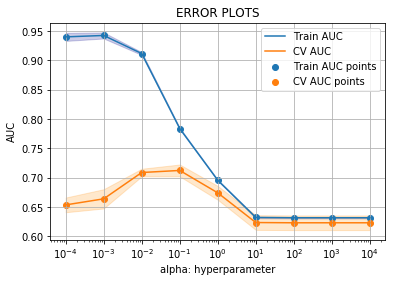

In [61]:
train_auc1= estimator.cv_results_['mean_train_score'][estimator.cv_results_['param_penalty']==p1]
train_auc_std1= estimator.cv_results_['std_train_score'][estimator.cv_results_['param_penalty']==p1]
cv_auc1 = estimator.cv_results_['mean_test_score'][estimator.cv_results_['param_penalty']==p1]
cv_auc_std1= estimator.cv_results_['std_test_score'][estimator.cv_results_['param_penalty']==p1]

ax=plt.subplot()
plt.plot(clf_param_grid['alpha'], train_auc1, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(clf_param_grid['alpha'],train_auc1 - train_auc_std1,train_auc1 + train_auc_std1,alpha=0.2,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(clf_param_grid['alpha'], cv_auc1, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(clf_param_grid['alpha'],cv_auc1 - cv_auc_std1,cv_auc1 + cv_auc_std1,alpha=0.2,color='darkorange')

plt.scatter(clf_param_grid['alpha'], train_auc1, label='Train AUC points')
plt.scatter(clf_param_grid['alpha'], cv_auc1, label='CV AUC points')

plt.xscale('log')
plt.axis('tight')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [62]:
model_new1=SGDClassifier(penalty=p1, alpha= b1,class_weight='balanced',random_state=1)
model_new1.fit(X_train,y_train)

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
import numpy as np
import math

# custom function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)

# test
scores = np.array([ -0.54761371,  17.04850603,   4.86054302])
print (sigmoid_v(scores))

[0.36641822 0.99999996 0.99231327]


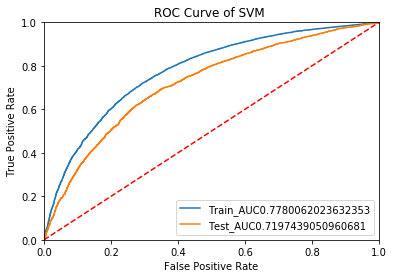

In [170]:
from  sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


score_roc_train = model_new1.decision_function(X_train)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, sigmoid_v(score_roc_train))
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new1.decision_function(X_test)
fpr_test, tpr_test, threshold_test = roc_curve(y_test,sigmoid_v( score_roc_test))
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM ')
plt.show()

In [171]:
y_train_pred = model_new1.predict(X_train)
y_test_pred = model_new1.predict(X_test)

In [172]:
# we are defining are own function for use probabilities to plot confusion matrix
# we have to plot confusion matrix at least fpr and high tpr values

def predict(proba,threshold,fpr,tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
     
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    

    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
    

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5088269083815256 for threshold 0.536


Text(0.5, 1.0, 'Confusion Matrix\n')

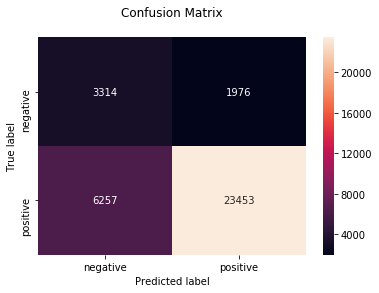

In [173]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
ax = plt.subplot()

print("Train confusion matrix")
cnn_train = confusion_matrix(y_train, predict(y_train_pred, threshold_train, fpr_train, tpr_train))
sns.heatmap(cnn_train,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4515797595248429 for threshold 0.557


Text(0.5, 1.0, 'Confusion Matrix\n')

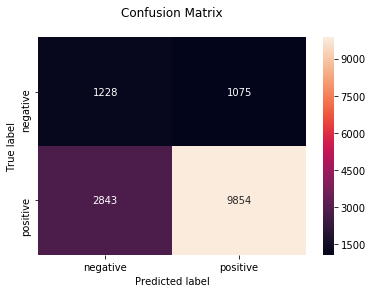

In [174]:
ax = plt.subplot()

print("Test confusion matrix")
cnn_test = confusion_matrix(y_test, predict(y_test_pred, threshold_test, fpr_test, tpr_test))
sns.heatmap(cnn_test,annot = True,ax=ax,fmt='d')

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

In [68]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,y_test_pred))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.30      0.53      0.39      2303
           1       0.90      0.78      0.83     12697

   micro avg       0.74      0.74      0.74     15000
   macro avg       0.60      0.65      0.61     15000
weighted avg       0.81      0.74      0.77     15000

_____________________________________________________________________________________________________


<h1>SET : 2 ()tf-idf

<h2> TFIDF VECTORIZER

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10)
preprocessed_essays_xtr_tfidf = vectorizer8.fit_transform(x_train['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtr_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 10483)


In [70]:
preprocessed_essays_xtest_tfidf = vectorizer8.transform(x_test['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtest_tfidf.shape)

Shape of matrix after one hot encodig  (15000, 10483)


In [71]:
vectorizer9 = TfidfVectorizer(min_df=10)
preprocessed_title_xtr_tfidf = vectorizer9.fit_transform(x_train['cleaned_title_text'])
print("Shape of matrix after one hot encodig ",preprocessed_title_xtr_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 1680)


In [72]:
preprocessed_title_xtest_tfidf = vectorizer9.transform(x_test['cleaned_title_text'])
print("Shape of matrix after one hot encodig ",preprocessed_title_xtest_tfidf.shape)

Shape of matrix after one hot encodig  (15000, 1680)


In [73]:
X_train_tfidf=hstack((preprocessed_essays_xtr_tfidf,preprocessed_title_xtr_tfidf,x_train_clean_cat_ohe,x_train_clean_subcat_ohe,x_train_state_ohe,x_train_teacher_pre,x_train_grade_ohe,x_train_price_std,x_train_teacher_previously_std
                   ,x_train_quantity_std ))
#X_cv_tfidf=hstack((preprocessed_essays_xcv_tfidf,preprocessed_title_xcv_tfidf,x_cv_clean_cat_ohe,x_cv_clean_subcat_ohe, x_cv_state_ohe, x_cv_teacher_pre, x_cv_grade_ohe, x_cv_price_std,x_cv_teacher_previously_std))
                 
X_test_tfidf=hstack((preprocessed_essays_xtest_tfidf,preprocessed_title_xtest_tfidf,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std
                    
                  ,x_test_quantity_std ))

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


clf_param_grid = {
    'alpha' : [10**-x for x in range(-6,5)],
    'penalty' : ['l1','l2']
}
SGD2 = SGDClassifier(class_weight='balanced')

estimator2 = GridSearchCV(SGD2, param_grid=clf_param_grid ,cv=10, verbose=2, scoring="roc_auc",n_jobs=-1)
estimator2.fit(X_train_tfidf,y_train)

print(estimator2.best_params_)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:   15.0s finished


{'alpha': 0.001, 'penalty': 'l2'}


In [75]:
b2=estimator2.best_params_["alpha"]
p2=estimator2.best_params_["penalty"]

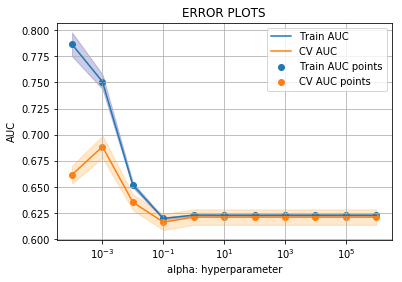

In [76]:
train_auc2= estimator2.cv_results_['mean_train_score'][estimator2.cv_results_['param_penalty']==p2]
train_auc_std2= estimator2.cv_results_['std_train_score'][estimator2.cv_results_['param_penalty']==p2]
cv_auc2 = estimator2.cv_results_['mean_test_score'][estimator2.cv_results_['param_penalty']==p2]
cv_auc_std2= estimator2.cv_results_['std_test_score'][estimator2.cv_results_['param_penalty']==p2]

ax=plt.subplot()
plt.plot(clf_param_grid['alpha'], train_auc2, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803362/4084039
plt.gca().fill_between(clf_param_grid['alpha'],train_auc2 - train_auc_std2,train_auc2 + train_auc_std2,alpha=0.2,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(clf_param_grid['alpha'], cv_auc2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803362/4084039
plt.gca().fill_between(clf_param_grid['alpha'],cv_auc2 - cv_auc_std2,cv_auc2 + cv_auc_std2,alpha=0.2,color='darkorange')

plt.scatter(clf_param_grid['alpha'], train_auc2, label='Train AUC points')
plt.scatter(clf_param_grid['alpha'], cv_auc2, label='CV AUC points')

plt.xscale('log')
plt.axis('tight')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [77]:
model_new2=SGDClassifier( penalty=p2, alpha= b2,class_weight='balanced')
model_new2.fit(X_train_tfidf,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

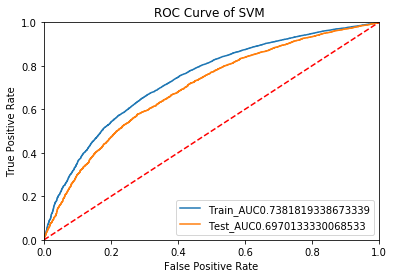

In [166]:
score_roc_train = model_new2.decision_function(X_train_tfidf)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, sigmoid_v(score_roc_train))
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new2.decision_function(X_test_tfidf)
fpr_test, tpr_test, threshold_test = roc_curve(y_test,sigmoid_v (score_roc_test))
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM ')
plt.show()

In [167]:
y_train_pred = model_new2.predict(X_train_tfidf)
y_test_pred = model_new2.predict(X_test_tfidf)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4614392180492079 for threshold 0.486


Text(0.5, 1.0, 'Confusion Matrix\n')

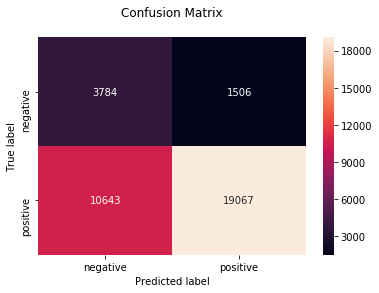

In [168]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("Train confusion matrix")
cnn_train = confusion_matrix(y_train, predict(y_train_pred, threshold_train, fpr_train, tpr_train))
sns.heatmap(cnn_train,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

test confusion matrix
the maximum value of tpr*(1-fpr) 0.41708355860060553 for threshold 0.103


Text(0.5, 1.0, 'Confusion Matrix\n')

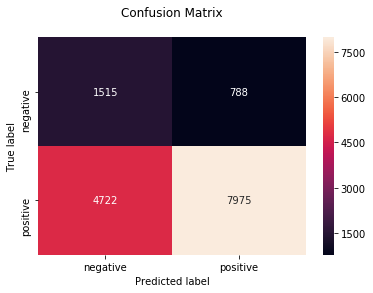

In [81]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("test confusion matrix")
cnn_test = confusion_matrix(y_test, predict(y_test_pred, threshold_test, fpr_test, tpr_test))
sns.heatmap(cnn_test,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

In [82]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,y_test_pred))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.24      0.66      0.35      2303
           1       0.91      0.63      0.74     12697

   micro avg       0.63      0.63      0.63     15000
   macro avg       0.58      0.64      0.55     15000
weighted avg       0.81      0.63      0.68     15000

_____________________________________________________________________________________________________


<h1>SET 3 [AVG-W2V]

In [83]:
list_preprocessed_essays_xtr = []
for e in x_train['cleaned_essays'].values:
    list_preprocessed_essays_xtr.append(e.split())

In [84]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
preprocessed_essays_xtr_w2v=Word2Vec(list_preprocessed_essays_xtr,min_count=10,size=100,workers =12 )

C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [85]:
# average Word2Vec
# compute average word2vec for each review.
preprocessed_essays_xtr_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['cleaned_essays']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in preprocessed_essays_xtr_w2v.wv.vocab:
            vector += preprocessed_essays_xtr_w2v[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    preprocessed_essays_xtr_avg_w2v_vectors.append(vector)

print(len(preprocessed_essays_xtr_avg_w2v_vectors))
print(len(preprocessed_essays_xtr_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:31<00:00, 1127.99it/s]


35000
100


In [86]:
preprocessed_essays_xtest_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['cleaned_essays']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in preprocessed_essays_xtr_w2v.wv.vocab:
            vector += preprocessed_essays_xtr_w2v[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    preprocessed_essays_xtest_avg_w2v_vectors.append(vector)

print(len(preprocessed_essays_xtest_avg_w2v_vectors))
print(len(preprocessed_essays_xtest_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:13<00:00, 1076.57it/s]


15000
100


In [87]:
list_preprocessed_title_xtr = []
for e in x_train['cleaned_title_text'].values:
    list_preprocessed_title_xtr.append(e.split())

In [88]:
preprocessed_title_xtr_w2v=Word2Vec(list_preprocessed_title_xtr,min_count=10,size=100,workers = 8)

In [89]:
preprocessed_title_xtr_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['cleaned_title_text']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in preprocessed_title_xtr_w2v.wv.vocab:
            vector += preprocessed_title_xtr_w2v[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    preprocessed_title_xtr_avg_w2v_vectors.append(vector)

print(len(preprocessed_title_xtr_avg_w2v_vectors))
print(len(preprocessed_title_xtr_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:01<00:00, 31160.73it/s]


35000
100


In [90]:
preprocessed_title_xtest_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['cleaned_title_text']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in preprocessed_title_xtr_w2v.wv.vocab:
            vector += preprocessed_title_xtr_w2v[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    preprocessed_title_xtest_avg_w2v_vectors.append(vector)

print(len(preprocessed_title_xtest_avg_w2v_vectors))
print(len(preprocessed_title_xtest_avg_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 31998.27it/s]


15000
100


In [91]:
from scipy.sparse import hstack
X_train_w2v=hstack((preprocessed_essays_xtr_avg_w2v_vectors,preprocessed_title_xtr_avg_w2v_vectors,x_train_clean_cat_ohe,x_train_clean_subcat_ohe,x_train_state_ohe,x_train_teacher_pre,x_train_grade_ohe,x_train_price_std,x_train_teacher_previously_std
                    ,x_train_quantity_std))
#X_cv_tfidf=hstack((preprocessed_essays_xcv_tfidf,preprocessed_title_xcv_tfidf,x_cv_clean_cat_ohe,x_cv_clean_subcat_ohe, x_cv_state_ohe, x_cv_teacher_pre, x_cv_grade_ohe, x_cv_price_std,x_cv_teacher_previously_std))
                 
X_test_w2v=hstack((preprocessed_essays_xtest_avg_w2v_vectors,preprocessed_essays_xtest_avg_w2v_vectors,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std
                    
                   ,x_test_quantity_std))

In [92]:
print(X_train_w2v.shape)
print(X_test_w2v.shape)

(35000, 303)
(15000, 303)


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier


clf_param_grid = {
    'alpha' : [10**-x for x in range(-6,5)],
    'penalty' : ['l1','l2']
}
SGD3 = SGDClassifier(class_weight='balanced')

estimator3 = RandomizedSearchCV(SGD3, param_distributions=clf_param_grid ,cv=10, verbose=2,scoring="roc_auc",n_jobs=6)
estimator3.fit(X_train_w2v,y_train)

print(estimator3.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:   10.3s finished


{'penalty': 'l2', 'alpha': 0.001}


In [94]:
b3=estimator3.best_params_["alpha"]
p3=estimator3.best_params_["penalty"]

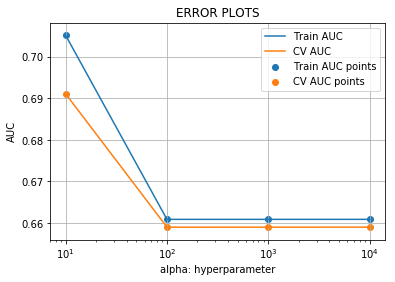

In [188]:
train_auc3= estimator3.cv_results_['mean_train_score'][estimator3.cv_results_['param_penalty']==p3]
train_auc_std3= estimator3.cv_results_['std_train_score'][estimator3.cv_results_['param_penalty']==p3]
cv_auc3 = estimator3.cv_results_['mean_test_score'][estimator3.cv_results_['param_penalty']==p3]
cv_auc_std3= estimator3.cv_results_['std_test_score'][estimator3.cv_results_['param_penalty']==p3]

plt.plot(clf_param_grid['alpha'][:4], train_auc3, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48803363/4084039
#plt.gca().fill_between(clf_param_grid['alpha'][:4],train_auc3 - train_auc_std3,train_auc3 + train_auc_std3,alpha=0.3,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(clf_param_grid['alpha'][:4], cv_auc3, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803363/4084039
#plt.gca().fill_between(clf_param_grid['alpha'][:4],cv_auc3 - cv_auc_std3,cv_auc3 + cv_auc_std3,alpha=0.3,color='darkorange')

plt.scatter(clf_param_grid['alpha'][:4], train_auc3, label='Train AUC points')
plt.scatter(clf_param_grid['alpha'][:4], cv_auc3, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [97]:
model_new3=SGDClassifier( penalty=p3, alpha= b3,class_weight='balanced')
model_new3.fit(X_train_w2v,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

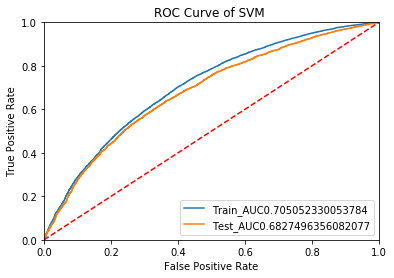

In [175]:
score_roc_train = model_new3.decision_function(X_train_w2v)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, sigmoid_v(score_roc_train))
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new3.decision_function(X_test_w2v)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, sigmoid_v(score_roc_test))
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM ')
plt.show()

In [176]:
y_train_pred = model_new3.predict(X_train_w2v)
y_test_pred = model_new3.predict(X_test_w2v)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42251539297010354 for threshold 0.418


Text(0.5, 1.0, 'Confusion Matrix\n')

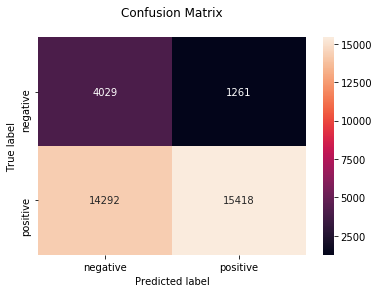

In [177]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("Train confusion matrix")
cnn_train = confusion_matrix(y_train, predict(y_train_pred, threshold_train, fpr_train, tpr_train))
sns.heatmap(cnn_train,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

test confusion matrix
the maximum value of tpr*(1-fpr) 0.4061383135864746 for threshold 0.628


Text(0.5, 1.0, 'Confusion Matrix\n')

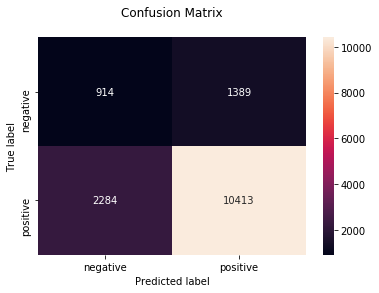

In [178]:
ax = plt.subplot()

print("test confusion matrix")
cnn_test = confusion_matrix(y_test, predict(y_test_pred, threshold_test, fpr_test, tpr_test))
sns.heatmap(cnn_test,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

In [179]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,y_test_pred))
print("_" * 101)

_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.29      0.40      0.33      2303
           1       0.88      0.82      0.85     12697

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.58      0.61      0.59     15000
weighted avg       0.79      0.76      0.77     15000

_____________________________________________________________________________________________________


<h1>SET : 4 [TFIDF-W2V]

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model1 = TfidfVectorizer()
tfidf_model1.fit(x_train['cleaned_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model1.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_words = set(tfidf_model1.get_feature_names())

In [104]:
# average Word2Vec
# compute average word2vec for each review.
preprocessed_essays_xtr_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['cleaned_essays']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_essays_xtr_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_essays_xtr_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_essays_xtr_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_essays_xtr_tfidf_w2v_vectors))
print(len(preprocessed_essays_xtr_tfidf_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 35000/35000 [14:38<00:00, 39.86it/s]


35000
100


In [105]:
preprocessed_essays_xtest_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['cleaned_essays']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_essays_xtr_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_essays_xtr_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_essays_xtest_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_essays_xtest_tfidf_w2v_vectors))
print(len(preprocessed_essays_xtest_tfidf_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:15<00:00, 39.95it/s]


15000
100


In [106]:
# Similarly you can vectorize for title also
tfidf_model2 = TfidfVectorizer()
tfidf_model2.fit(x_train['cleaned_title_text'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model2.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_words = set(tfidf_model2.get_feature_names())

In [107]:
preprocessed_title_xtr_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['cleaned_title_text']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_title_xtr_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_title_xtr_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_title_xtr_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_title_xtr_tfidf_w2v_vectors))
print(len(preprocessed_title_xtr_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:05<00:00, 6750.53it/s]


35000
100


In [108]:
preprocessed_title_xtest_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['cleaned_title_text']): # for each review/sentence
    vector = np.zeros(100) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in list(preprocessed_title_xtr_w2v.wv.vocab)) and (word in tfidf_words):
            vec = preprocessed_title_xtr_w2v[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_title_xtest_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_title_xtest_tfidf_w2v_vectors))
print(len(preprocessed_title_xtest_tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:02<00:00, 6379.80it/s]


15000
100


In [109]:

X_train_tfidf_w2v=hstack((preprocessed_essays_xtr_tfidf_w2v_vectors,preprocessed_title_xtr_tfidf_w2v_vectors,x_train_clean_cat_ohe,x_train_clean_subcat_ohe,x_train_state_ohe,x_train_teacher_pre,x_train_grade_ohe,x_train_price_std,x_train_teacher_previously_std
                 ,x_train_quantity_std   ))
#X_cv_tfidf=hstack((preprocessed_essays_xcv_tfidf,preprocessed_title_xcv_tfidf,x_cv_clean_cat_ohe,x_cv_clean_subcat_ohe, x_cv_state_ohe, x_cv_teacher_pre, x_cv_grade_ohe, x_cv_price_std,x_cv_teacher_previously_std))
                 
X_test_tfidf_w2v=hstack((preprocessed_essays_xtest_tfidf_w2v_vectors,preprocessed_essays_xtest_tfidf_w2v_vectors,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std
                    
                   ,x_test_quantity_std))

In [110]:
print(X_train_tfidf_w2v.shape)
print(X_test_tfidf_w2v.shape)

(35000, 303)
(15000, 303)


In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier


clf_param_grid = {
    'alpha' : [10**-x for x in range(-6,6)],
    'penalty' : ['l1','l2']
}
SGD4 = SGDClassifier(class_weight='balanced')

estimator4 = RandomizedSearchCV(SGD4, param_distributions=clf_param_grid ,cv=10, verbose=2,scoring="roc_auc",n_jobs=4)
estimator4.fit(X_train_tfidf_w2v,y_train)

print(estimator4.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.8s finished


{'penalty': 'l2', 'alpha': 0.01}


In [112]:
b4=estimator4.best_params_["alpha"]
p4=estimator4.best_params_["penalty"]

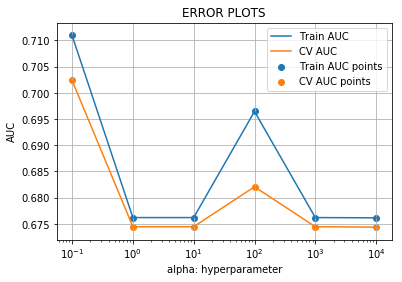

In [147]:
train_auc4= estimator4.cv_results_['mean_train_score'][estimator4.cv_results_['param_penalty']==p4]
train_auc_std4= estimator4.cv_results_['std_train_score'][estimator4.cv_results_['param_penalty']==p4]
cv_auc4 = estimator4.cv_results_['mean_test_score'][estimator4.cv_results_['param_penalty']==p4]
cv_auc_std4= estimator4.cv_results_['std_test_score'][estimator4.cv_results_['param_penalty']==p4]

ax=plt.subplot()
plt.plot(clf_param_grid['alpha'][:6], train_auc4, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/48804464/4084049
#plt.gca().fill_between(clf_param_grid['alpha'][:6],train_auc4 - train_auc_std4,train_auc4 + train_auc_std4,alpha=0.4,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(clf_param_grid['alpha'][:6], cv_auc4, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48804464/4084049
#plt.gca().fill_between(clf_param_grid['alpha'][:6],cv_auc4 - cv_auc_std4,cv_auc4 + cv_auc_std4,alpha=0.4,color='darkorange')

plt.scatter(clf_param_grid['alpha'][:6], train_auc4, label='Train AUC points')
plt.scatter(clf_param_grid['alpha'][:6], cv_auc4, label='CV AUC points')
plt.axis([10**-1,10**5,0.675,0.710])
plt.xscale('log')
plt.axis('tight')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [120]:
model_new4 = SGDClassifier( penalty=p4, alpha=b4,class_weight='balanced')
model_new4.fit(X_train_tfidf_w2v,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

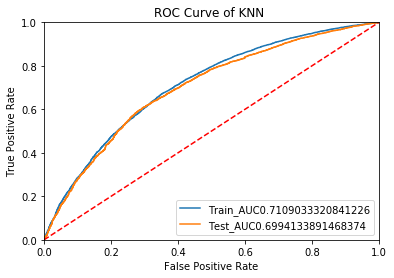

In [180]:
score_roc_train = model_new4.decision_function(X_train_tfidf_w2v)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, sigmoid_v(score_roc_train))
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new4.decision_function(X_test_tfidf_w2v)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, sigmoid_v(score_roc_test))
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN ')
plt.show()

In [181]:
y_train_pred = model_new4.predict(X_train_tfidf_w2v)
y_test_pred = model_new4.predict(X_test_tfidf_w2v)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.43533277892978056 for threshold 0.44


Text(0.5, 1.0, 'Confusion Matrix\n')

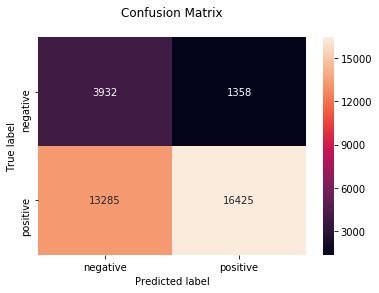

In [182]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("Train confusion matrix")
cnn_train = confusion_matrix(y_train, predict(y_train_pred, threshold_train, fpr_train, tpr_train))
sns.heatmap(cnn_train,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

test confusion matrix
the maximum value of tpr*(1-fpr) 0.4292029349967312 for threshold 0.481


Text(0.5, 1.0, 'Confusion Matrix\n')

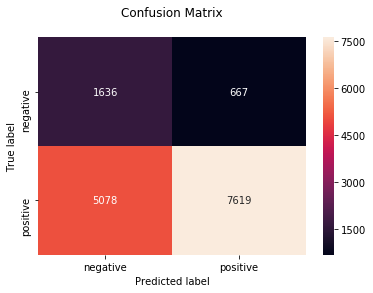

In [183]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("test confusion matrix")
cnn_test = confusion_matrix(y_test, predict(y_test_pred, threshold_test, fpr_test, tpr_test))
sns.heatmap(cnn_test,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

In [125]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,y_test_pred))
print("_" * 101)

_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.24      0.71      0.36      2303
           1       0.92      0.60      0.73     12697

   micro avg       0.62      0.62      0.62     15000
   macro avg       0.58      0.66      0.54     15000
weighted avg       0.82      0.62      0.67     15000

_____________________________________________________________________________________________________


<h1>SET : 5 [Truncated SVD]

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10)
preprocessed_essays_xtr_tfidf = vectorizer8.fit_transform(x_train['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtr_tfidf.shape)

preprocessed_essays_xtest_tfidf = vectorizer8.transform(x_test['cleaned_essays'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_xtest_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 10483)
Shape of matrix after one hot encodig  (15000, 10483)


<h1>CHECK FOR VARIANCE EXPLAINED BY n_components and find best no. of component

In [127]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6000, algorithm='randomized', n_iter=5, random_state=None, tol=0.0001)
svd.fit(preprocessed_essays_xtr_tfidf)


TruncatedSVD(algorithm='randomized', n_components=6000, n_iter=5,
       random_state=None, tol=0.0001)

In [128]:
# List of explained variances
tsvd_var_ratios = svd.explained_variance_ratio_
np.cumsum(tsvd_var_ratios)

array([0.00398695, 0.01444983, 0.02338521, ..., 0.95587842, 0.95589644,
       0.95591441])

In [129]:
# Create a function for find best no. of components
def select_n_components(var_ratio, goal_var: float):
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
       
        total_variance += explained_variance
        
      
        n_components += 1
        
     
        if total_variance >= goal_var:
            
            break
            
   
    return n_components

<h1>Find total of 95% var explained

In [130]:
n_components=select_n_components(tsvd_var_ratios, 0.95)
n_components

5706

In [131]:
from sklearn.decomposition import TruncatedSVD

svd_tr = TruncatedSVD(n_components=5722, algorithm='randomized', n_iter=5, random_state=None, tol=0.001)
svd_train = svd_tr.fit_transform(preprocessed_essays_xtr_tfidf)
svd_test = svd_tr.transform(preprocessed_essays_xtest_tfidf)

In [132]:
from scipy.sparse import hstack
X_train_s5=hstack((svd_train,x_train_clean_cat_ohe,x_train_clean_subcat_ohe,x_train_state_ohe,x_train_teacher_pre,x_train_grade_ohe,x_train_price_std,x_train_teacher_previously_std
                   ,x_train_quantity_std )).tocsr()
                 
X_test_s5=hstack((svd_test,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_state_ohe, x_test_teacher_pre, x_test_grade_ohe, x_test_price_std,x_test_teacher_previously_std
                    
                   ,x_test_quantity_std)).tocsr()

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


clf_param_grid = {
    'alpha' : [10**-x for x in range(-4,5)],
    'penalty' : ['l1','l2']
}
SGD5 = SGDClassifier(class_weight='balanced')

estimator5 = GridSearchCV(SGD5, param_grid=clf_param_grid ,cv=5, verbose=21, scoring="roc_auc",n_jobs=3)
estimator5.fit(X_train_s5,y_train)

print(estimator5.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  3.5min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  6.7min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  6.7min
[Parallel(

{'alpha': 0.0001, 'penalty': 'l1'}


In [134]:
b5=estimator5.best_params_["alpha"]
p5=estimator5.best_params_["penalty"]

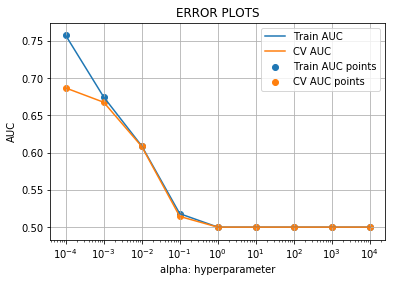

In [137]:
train_auc5= estimator5.cv_results_['mean_train_score'][estimator5.cv_results_['param_penalty']==p5]
train_auc_std5= estimator5.cv_results_['std_train_score'][estimator5.cv_results_['param_penalty']==p5]
cv_auc5 = estimator5.cv_results_['mean_test_score'][estimator5.cv_results_['param_penalty']==p5]
cv_auc_std5= estimator5.cv_results_['std_test_score'][estimator5.cv_results_['param_penalty']==p5]

ax=plt.subplot()
plt.plot(clf_param_grid['alpha'][:9], train_auc5, label='Train AUC')

# this code is copied from here: https://stackoverflow.com/a/58805565/5085059
#plt.gca().fill_between(clf_param_grid['alpha'][:9],train_auc5 - train_auc_std5,train_auc5 + train_auc_std5,alpha=0.5,color='darkblue')
# create a shaded area between [mean - std, mean + std]

plt.plot(clf_param_grid['alpha'][:9], cv_auc5, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/58805565/5085059
#plt.gca().fill_between(clf_param_grid['alpha'][:9],cv_auc5 - cv_auc_std5,cv_auc5 + cv_auc_std5,alpha=0.5,color='darkorange')

plt.scatter(clf_param_grid['alpha'][:9], train_auc5, label='Train AUC points')
plt.scatter(clf_param_grid['alpha'][:9], cv_auc5, label='CV AUC points')
plt.axis([10**-2,10**5,0.675,0.710])
plt.xscale('log')
plt.axis('tight')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [138]:
model_new5=SGDClassifier( penalty=p5, alpha=b5,class_weight='balanced')
model_new5.fit(X_train_s5,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

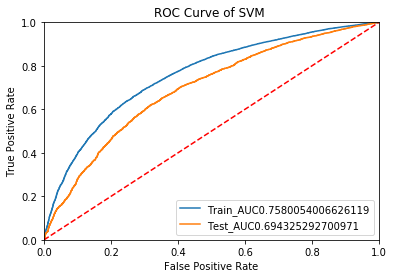

In [184]:
score_roc_train = model_new5.decision_function(X_train_s5)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, sigmoid_v(score_roc_train))
roc_auc_train = auc(fpr_train, tpr_train)

score_roc_test = model_new5.decision_function(X_test_s5)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, sigmoid_v(score_roc_test))
roc_auc_test = auc(fpr_test, tpr_test)


plt.plot(fpr_train, tpr_train, label = "Train_AUC"+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_test, tpr_test, label = "Test_AUC"+str(auc(fpr_test, tpr_test)))
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM ')
plt.show()

In [185]:
y_train_pred = model_new5.predict(X_train_s5)
y_test_pred = model_new5.predict(X_test_s5)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.484920253057438 for threshold 0.482


Text(0.5, 1.0, 'Confusion Matrix\n')

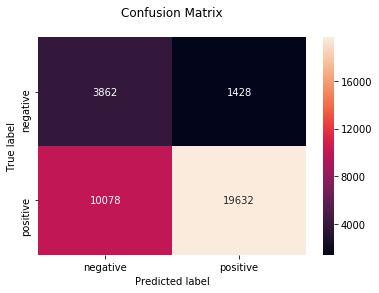

In [186]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("Train confusion matrix")
cnn_train = confusion_matrix(y_train, predict(y_train_pred, threshold_train, fpr_train, tpr_train))
sns.heatmap(cnn_train,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

test confusion matrix
the maximum value of tpr*(1-fpr) 0.42276687703999477 for threshold 0.514


Text(0.5, 1.0, 'Confusion Matrix\n')

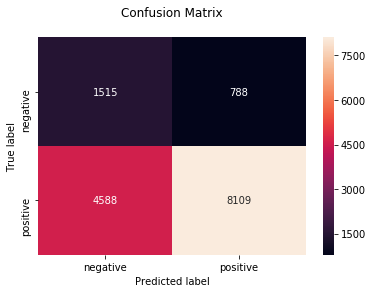

In [187]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()

print("test confusion matrix")
cnn_test = confusion_matrix(y_test, predict(y_test_pred, threshold_test, fpr_test, tpr_test))
sns.heatmap(cnn_test,annot = True,ax=ax,fmt='d')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title('Confusion Matrix\n')

In [146]:
from sklearn.metrics import classification_report
print("_" * 101)
print("Classification Report: \n")
print(classification_report(y_test,y_test_pred))
print("_" * 101)


_____________________________________________________________________________________________________
Classification Report: 

              precision    recall  f1-score   support

           0       0.25      0.66      0.36      2303
           1       0.91      0.64      0.75     12697

   micro avg       0.64      0.64      0.64     15000
   macro avg       0.58      0.65      0.56     15000
weighted avg       0.81      0.64      0.69     15000

_____________________________________________________________________________________________________


In [151]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['Vectorizer','Model','Hyperparameter_alpha','Hyperparameter_penalty','AUC']

pretty.add_row(['BOW','BRUTE',b1,p1,'0.71'])
pretty.add_row(['TF-IDF','BRUTE',b2,p2,'0.69'])
pretty.add_row(['AVG W2V','BRUTE',b3,p3,'0.68'])
pretty.add_row(['TFIDF WEIGHTED','BRUTE',b4,p4,'0.69'])
pretty.add_row(['TRUNCATED SVD','BRUTE',b5,p5,'0.69'])

In [152]:
print(pretty)

+----------------+-------+----------------------+------------------------+------+
|   Vectorizer   | Model | Hyperparameter_alpha | Hyperparameter_penalty | AUC  |
+----------------+-------+----------------------+------------------------+------+
|      BOW       | BRUTE |         0.1          |           l2           | 0.71 |
|     TF-IDF     | BRUTE |        0.001         |           l2           | 0.69 |
|    AVG W2V     | BRUTE |        0.001         |           l2           | 0.68 |
| TFIDF WEIGHTED | BRUTE |         0.01         |           l2           | 0.69 |
| TRUNCATED SVD  | BRUTE |        0.0001        |           l1           | 0.69 |
+----------------+-------+----------------------+------------------------+------+
